# Neste algoritmo vamos construir uma rede neural convolucional para classificação binária de images!
# Exploring Data Augmentation
No exercício anterior desenvolvemos uma rede neural convolucional um data set de 3 mil imagens e vimos que ocorreu o esperado: Overfitting por causa do baixo número de dados. Neste exercício vamos construir um método para aumentar a quantidade dos nossos dados e re-treinar nosso modelo e verificar sua qualidade.

In [1]:
# Vamos começar criando uma instancia do ImageDataGenerator:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range = 0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')
# Criamos um  conjunto de transformações para aumentar nosso dataset

In [3]:
import os
import zipfile

In [11]:
local_zip = 'cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

FileNotFoundError: [Errno 2] No such file or directory: 'cats_and_dogs_filtered.zip'

In [4]:
base_dir = 'D:/data/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [5]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Getting the training file names
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

# Diretório do test set dos gatos
#test_cats_dir = os.path.join(test_dir, 'cats')

# Diretório do test set dos cachorros
#test_dogs_dir = os.path.join(test_dir, 'dogs')

# Getting the validation file names
validation_cats_fnames = os.listdir(validation_cats_dir)
validation_dogs_fnames = os.listdir(validation_dogs_dir)

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [7]:
# Vamos importar os módulos que fazem transformação de imagem para matriz e vice-versa
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

In [19]:
img_path = os.path.join(train_cats_dir, train_cat_fnames[90]) ## Apenas definimos o diretório das images e 1 imagem em específico
                                                                # Lembrando  que train_cat_fnames = os.listdir(train_cats_dir)
                                                # É uma lista com o nome de todas as imagens..
img = load_img(img_path, target_size=(150, 150)) # Carregamos a imagem já transformando ela no tamanho desejado, 150x150.
x = img_to_array(img)                            # Transformamos a imagem numa matrix. Perceba a notação matricial.
x.shape

(150, 150, 3)

In [20]:
x=x.reshape((1,) + x.shape) # Fazendo uma transformação nas dimensões que eu ainda NAO ENTENDI PQ
x.shape

(1, 150, 150, 3)

In [21]:
# Agora vamos gerar as imagens:
import matplotlib.pyplot as plt

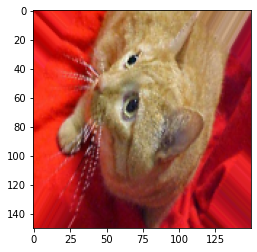

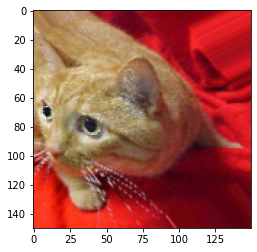

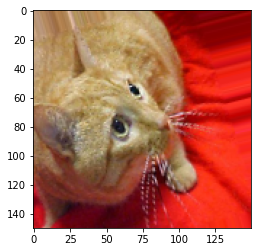

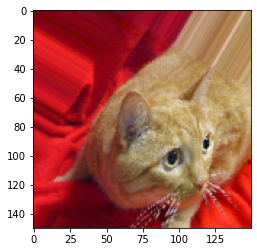

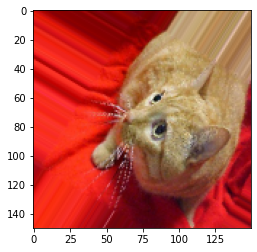

In [22]:
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(array_to_img(batch[0]))
    i+=1
    if i%5 ==0:
        break

# Agora vamos implementar este data augmentation para o dataset inteiro e treinar o modelo novamente

In [23]:
# Criando o conjunto de transformações para o training set

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [24]:
# Criando o reescalamento das imagens para o test set
# A única transformação que o testset recebe é o reescaling dos pixels
val_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
# Transformando de fato as imagens. O tensorflow 'flow from directory' aplica a transformação 'datagen' que criamos
# Antes e aplica em todos os arquivos do diretório especificado.

train_generator = train_datagen.flow_from_directory(
                                            train_dir,
                                            target_size=(150, 150),
                                            batch_size=20,
                                            class_mode='binary')

Found 2800 images belonging to 2 classes.


In [26]:
#Aplicando a transformação nas imagens de validação

validation_generator = val_datagen.flow_from_directory(
                                        validation_dir,
                                        target_size=(150, 150),
                                        batch_size=20,
                                        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [27]:
# Agora vou tentar fazer o meu generator (apenas reescalar) para o meu test set:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
            test_dir,
            target_size=(150,150),
            batch_size=20,
            class_mode='binary')

FileNotFoundError: [WinError 3] O sistema não pode encontrar o caminho especificado: 'D:/data/cats_and_dogs_filtered\\test'

# Criando as camadas de convolução e Max Pooling

In [28]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

In [29]:
# Definindo as dimensoes da imagem que vai entrar
img_input = layers.Input(shape=(150, 150, 3))

In [30]:
# Definindo a 1° camada, com 16  filtros 3x3
# E depois da convolução aplica-se um MaxPooling 2x2.
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

In [31]:
# Definindo a 2° camada, com 32 filtros 3x3
# E depois da convolução aplica-se um MaxPooling 2x2.
x = layers.Conv2D(32, 3, activation ='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [32]:
# Definindo a 3° Camada, com 64 filtros 3x3
# E depois da convolução aplica-se um MaxPooling 2x2.
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [33]:
# Convertendo o output da 3° camada para tensor unidimensional
x = layers.Flatten()(x)

In [34]:
x.shape

TensorShape([None, 18496])

In [35]:
# Criando a penultima camada fully conected:
x = layers.Dense(512, activation = 'relu')(x)

In [36]:
x.shape

TensorShape([None, 512])

# Dropout - prevenir overfitting

In [37]:
# Adicionando o DROPOUT, com learning rate =.5
x = layers.Dropout(0.5)(x)

In [38]:
# Definindo a ultima camada, com apenas 1 neuronio e
# Funcao sigmoid
output = layers.Dense(1, activation='sigmoid')(x)

In [39]:
# Configurando e compilando o modelo
model = Model(img_input, output)
model.compile(loss = 'binary_crossentropy',
             optimizer='adam',
             metrics=['acc'])

In [40]:
# Re-treinando o fucking modelo
modelo = model.fit(train_generator,
                            steps_per_epoch=100,
                            epochs=50,
                            validation_data=validation_generator,
                            validation_steps=50,
                            verbose=1)

Epoch 1/50
100/100 [==============================] - 87s 856ms/step - loss: 0.6709 - acc: 0.6415 - val_loss: 0.6967 - val_acc: 0.5150
Epoch 2/50
100/100 [==============================] - 48s 480ms/step - loss: 0.6384 - acc: 0.6510 - val_loss: 0.6598 - val_acc: 0.5660
Epoch 3/50
100/100 [==============================] - 38s 375ms/step - loss: 0.6171 - acc: 0.6620 - val_loss: 0.7525 - val_acc: 0.5160
Epoch 4/50
100/100 [==============================] - 39s 388ms/step - loss: 0.5730 - acc: 0.6680 - val_loss: 0.6624 - val_acc: 0.5690
Epoch 5/50
100/100 [==============================] - 42s 421ms/step - loss: 0.5261 - acc: 0.6905 - val_loss: 0.6423 - val_acc: 0.6300
Epoch 6/50
100/100 [==============================] - 48s 478ms/step - loss: 0.4893 - acc: 0.7180 - val_loss: 0.6161 - val_acc: 0.6520
Epoch 7/50
100/100 [==============================] - 57s 567ms/step - loss: 0.4801 - acc: 0.7220 - val_loss: 0.6170 - val_acc: 0.6430
Epoch 8/50
100/100 [==============================] - 6

In [41]:
# Agora vamos reavaliar os resultados

In [46]:
# Coletando as acurácias do modelo
train_acuracias = modelo.history['acc']
val_acuracias = modelo.history['val_acc']

In [47]:
# Coletando os loss do modelo
train_loss = modelo.history['loss']
val_loss = modelo.history['val_loss']

In [48]:
# Quantidade de épocas
epochs = range(len(train_acuracias))

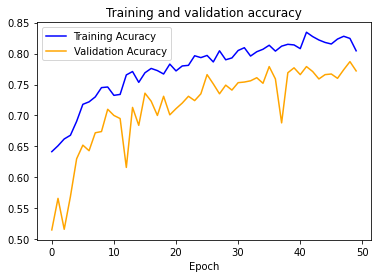

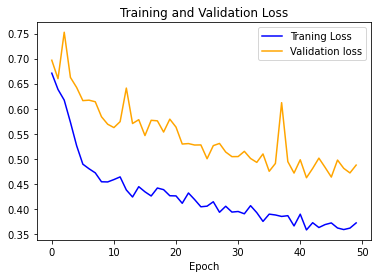

In [49]:
plt.plot(epochs, train_acuracias, color = 'blue', label='Training Acuracy')
plt.plot(epochs, val_acuracias, color = 'orange', label='Validation Acuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, color='blue', label = 'Traning Loss')
plt.plot(epochs, val_loss, color = 'orange', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.legend()

In [50]:
print('Maior acurácia :', max(val_acuracias))
print('Menor loss: ', min(val_loss))

Maior acurácia : 0.7870000004768372
Menor loss:  0.4622548222541809


In [54]:
# Fazendo predição do validation dataset
predictions = model.predict(validation_generator)

In [55]:
predictions

array([[0.55540854],
       [0.704735  ],
       [0.18051136],
       [0.9474665 ],
       [0.9999734 ],
       [0.698451  ],
       [0.19010103],
       [0.16903022],
       [0.5146237 ],
       [0.50580174],
       [0.06607276],
       [0.3469954 ],
       [0.76099694],
       [0.7798515 ],
       [0.98279506],
       [1.        ],
       [0.03795454],
       [0.41074824],
       [0.6782193 ],
       [0.97726595],
       [0.54980785],
       [0.19892585],
       [0.3633964 ],
       [0.28975317],
       [0.35042667],
       [0.43054703],
       [0.29844028],
       [0.823457  ],
       [0.52478945],
       [0.09690231],
       [0.98329425],
       [0.553163  ],
       [0.22756615],
       [0.54065436],
       [0.5365219 ],
       [0.37707442],
       [0.35400957],
       [0.12305197],
       [0.7077115 ],
       [0.4211551 ],
       [0.7918761 ],
       [0.6155831 ],
       [0.7190244 ],
       [0.8580569 ],
       [0.46448788],
       [0.46826994],
       [0.22194827],
       [0.616

In [51]:
# Salvando o modelo
model.save_weights('Wcatsvsdogs_CNN.h5')
model.save('catsvsdogs_CNN.h5')

In [38]:
test_image = load_img(os.path.join(test_cats_dir, test_cats_fnames[0]),target_size=(150,150))

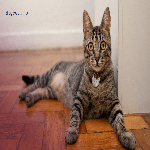

In [39]:
test_image

In [40]:
test_array = img_to_array(test_image)

In [41]:
test_array

array([[[215., 202., 199.],
        [215., 203., 195.],
        [215., 202., 199.],
        ...,
        [190., 176., 164.],
        [190., 176., 164.],
        [190., 176., 164.]],

       [[211., 197., 194.],
        [215., 202., 199.],
        [215., 203., 195.],
        ...,
        [190., 176., 164.],
        [190., 176., 164.],
        [185., 172., 159.]],

       [[211., 197., 194.],
        [211., 197., 194.],
        [215., 203., 195.],
        ...,
        [190., 176., 164.],
        [190., 176., 164.],
        [190., 176., 164.]],

       ...,

       [[119.,  53.,  58.],
        [126.,  55.,  57.],
        [131.,  58.,  57.],
        ...,
        [135.,  78.,  46.],
        [129.,  73.,  43.],
        [129.,  73.,  43.]],

       [[119.,  53.,  58.],
        [126.,  55.,  57.],
        [126.,  55.,  57.],
        ...,
        [141.,  83.,  48.],
        [135.,  78.,  46.],
        [129.,  73.,  43.]],

       [[113.,  51.,  58.],
        [113.,  51.,  58.],
        [105.,  

In [42]:
test_array = 1.*test_array/255

In [43]:
test_array

array([[[0.84313726, 0.7921569 , 0.78039217],
        [0.84313726, 0.79607844, 0.7647059 ],
        [0.84313726, 0.7921569 , 0.78039217],
        ...,
        [0.74509805, 0.6901961 , 0.6431373 ],
        [0.74509805, 0.6901961 , 0.6431373 ],
        [0.74509805, 0.6901961 , 0.6431373 ]],

       [[0.827451  , 0.77254903, 0.7607843 ],
        [0.84313726, 0.7921569 , 0.78039217],
        [0.84313726, 0.79607844, 0.7647059 ],
        ...,
        [0.74509805, 0.6901961 , 0.6431373 ],
        [0.74509805, 0.6901961 , 0.6431373 ],
        [0.7254902 , 0.6745098 , 0.62352943]],

       [[0.827451  , 0.77254903, 0.7607843 ],
        [0.827451  , 0.77254903, 0.7607843 ],
        [0.84313726, 0.79607844, 0.7647059 ],
        ...,
        [0.74509805, 0.6901961 , 0.6431373 ],
        [0.74509805, 0.6901961 , 0.6431373 ],
        [0.74509805, 0.6901961 , 0.6431373 ]],

       ...,

       [[0.46666667, 0.20784314, 0.22745098],
        [0.49411765, 0.21568628, 0.22352941],
        [0.5137255 , 0

# Teste com imagens novas!
Adicionei imagens dos meus gatos e imagens aleatórias de cachorros da internet, vamos ver como ele vai se sair ao classificar essas images

In [44]:
test_array = test_array.reshape((1,)+test_array.shape)
test_array.shape

(1, 150, 150, 3)

In [56]:
a = model.predict(test_array)

In [57]:
a

array([[0.40939182]], dtype=float32)

In [46]:
print(test_acc)

NameError: name 'test_acc' is not defined

In [ ]:
test_generator

In [ ]:
img_path = os.path.join(train_cats_dir, train_cat_fnames[500]) ## Apenas definimos o diretório das images e 1 imagem em específico
                                                # Lembrando  que train_cat_fnames = os.listdir(train_cats_dir)
                                                # É uma lista com o nome de todas as imagens..
img = load_img(img_path, target_size=(150, 150)) # Carregamos a imagem já transformando ela no tamanho desejado, 150x150.


In [ ]:
img

In [ ]:
x = img_to_array(img)                            # Transformamos a imagem numa matrix. Perceba a notação matricial.

In [ ]:
x